In [27]:
!pip install category_encoders

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
data = pd.read_csv('C:/Users/Marie/Desktop/adult.data',header = None)
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [30]:
data = data.set_index("marital_status")
data = data.set_index("relationship")

In [31]:
encoder = ce.OrdinalEncoder(cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'occupation', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'])
data = encoder.fit_transform(data)
data

,age,workclass,fnlwgt,education,education_num,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
relationship,,,,,,,,,,,,,
Not-in-family,1,1,1,1,1,1,1,1,1,1,1,1,<=50K
Husband,2,2,2,1,1,2,1,1,2,1,2,1,<=50K
Not-in-family,3,3,3,2,2,3,1,1,2,1,1,1,<=50K
Husband,4,3,4,3,3,3,2,1,2,1,1,1,<=50K
Wife,5,3,5,1,1,4,2,2,2,1,1,2,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wife,38,3,21648,7,7,11,1,2,2,1,15,1,<=50K
Husband,14,3,630,2,2,10,1,1,2,1,1,1,>50K
Unmarried,51,3,19508,2,2,1,1,2,2,1,1,1,<=50K


data["marital_status"] = data['marital_status'].str.replace(' ', '').astype(float)
data["marital_status"] = data['marital_status'].str.replace(',', '').astype(float)
data["relationship"] = data['relationship'].str.replace(' ', '').astype(float)
data["relationship"] = data['relationship'].str.replace(',', '').astype(float)

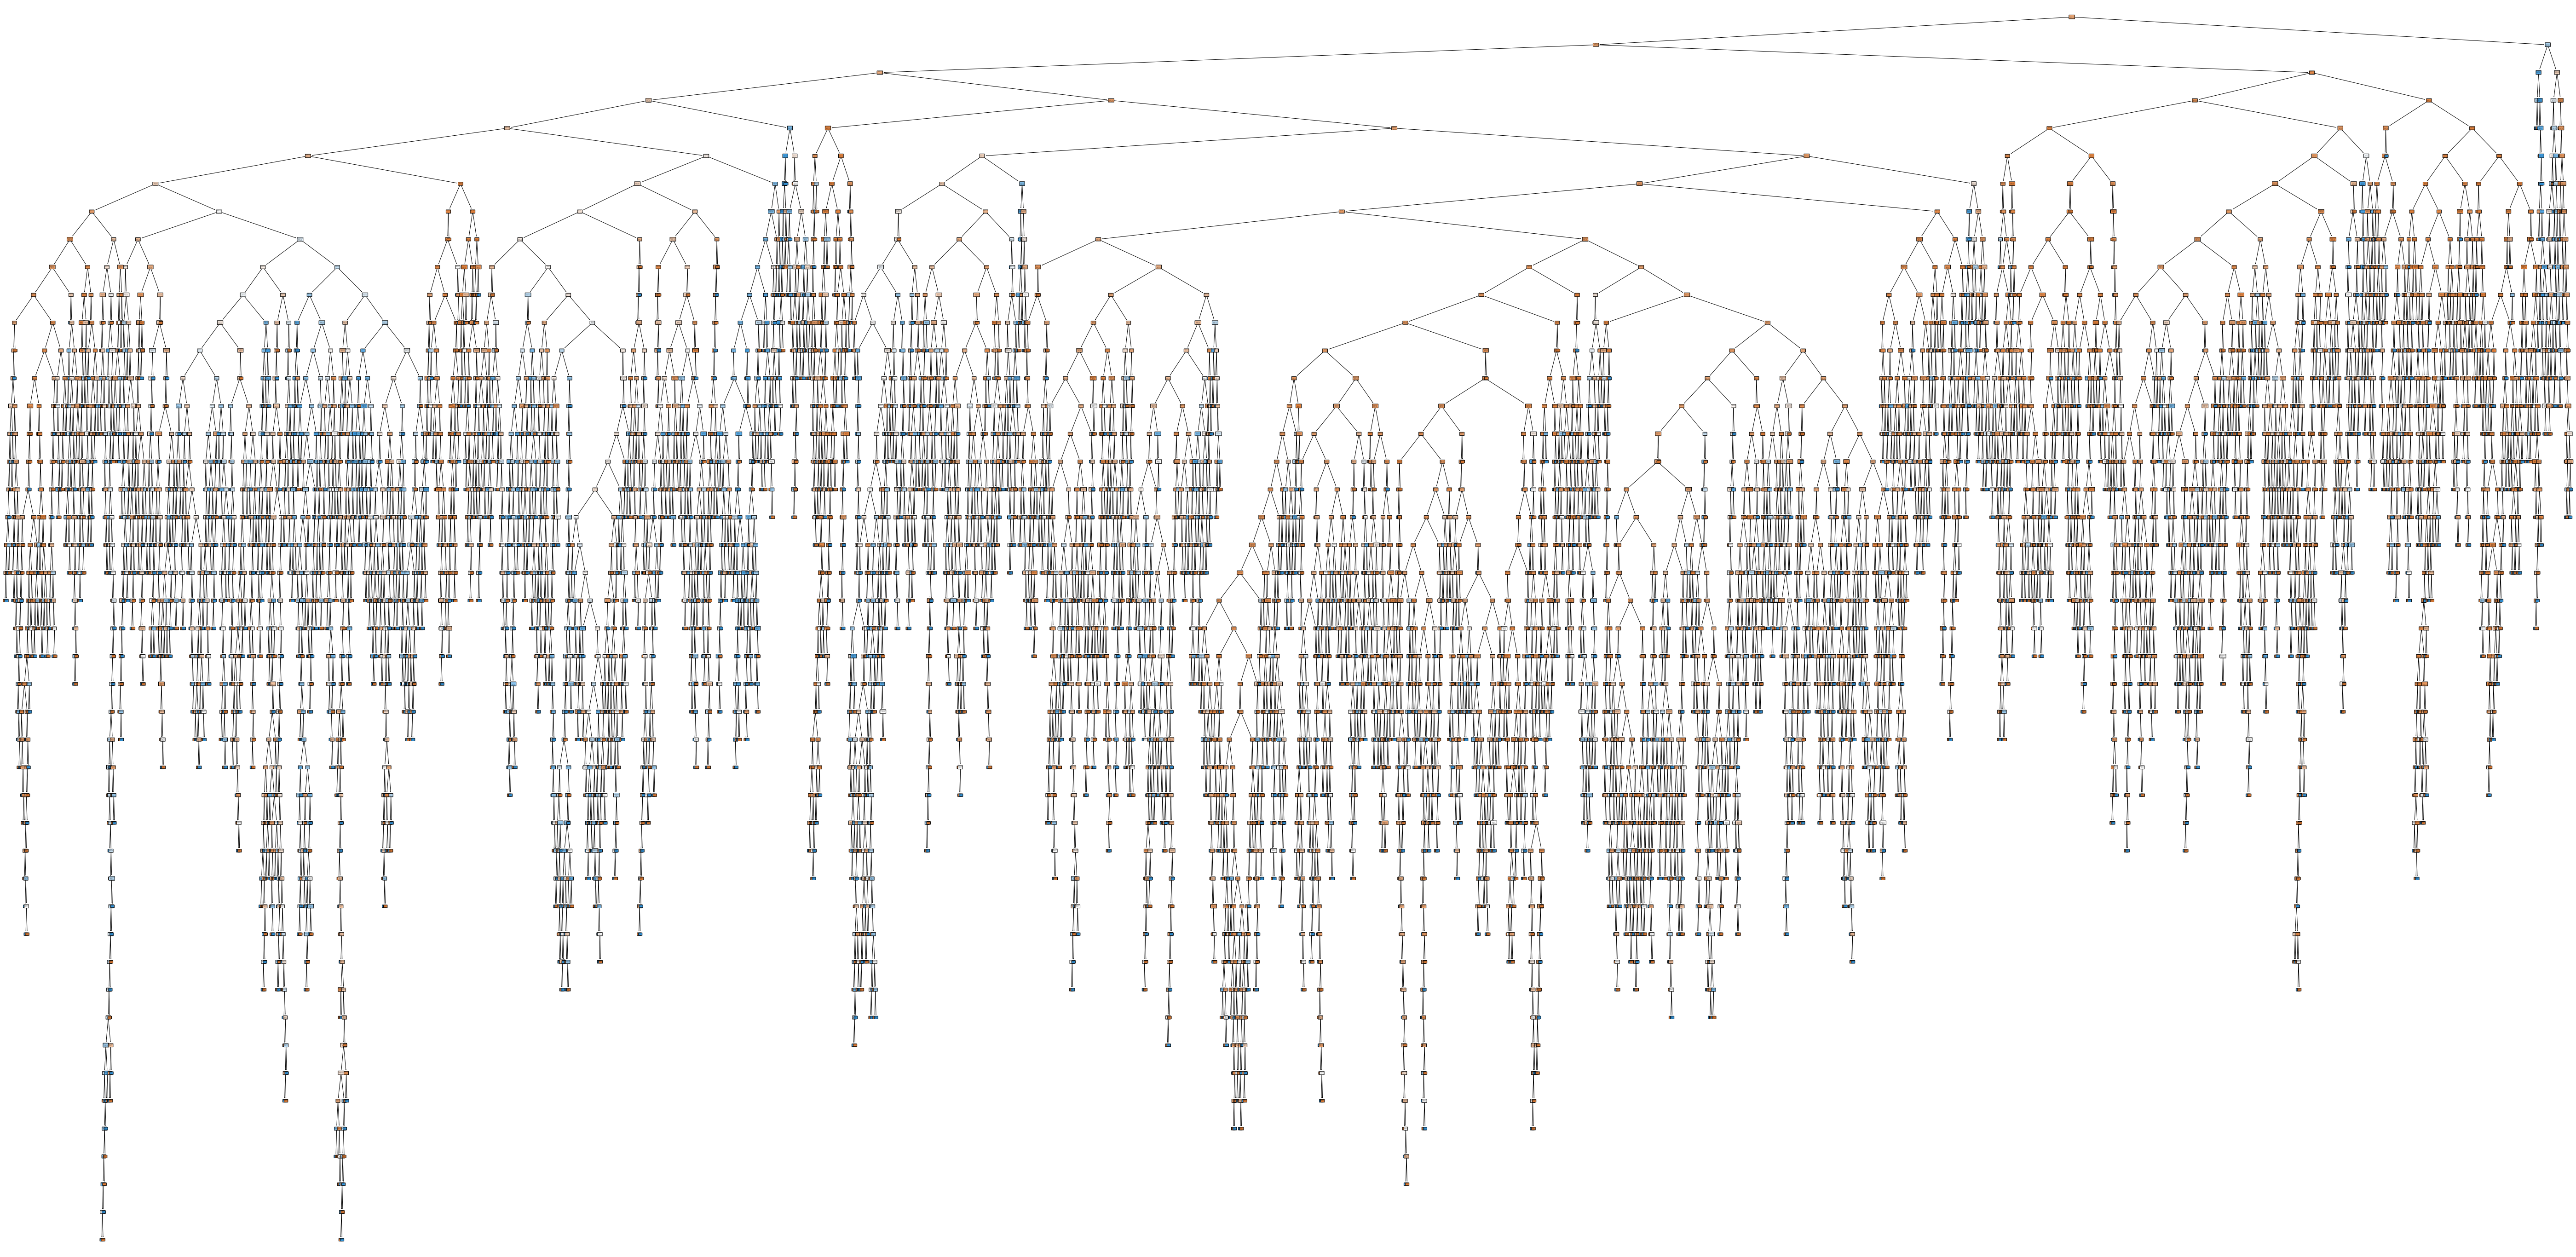

In [32]:
plt.figure(figsize=(100, 50))

dtc_inf_gain = DecisionTreeClassifier(criterion='entropy')
dtc_inf_gain.fit(data.drop(['income'], axis=1), data['income'])
_ = tree.plot_tree(decision_tree=dtc_inf_gain,
                   feature_names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'occupation', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
                   class_names=['<=50K', '>50K'],
                   rounded=True,
                   filled=True)

Визуализация
Сравнение байесовской классификации и деревьев решений

In [9]:
sample_ratios = np.arange(0.6, 0.9, 0.05)
gnb = GaussianNB()
dtc_inf_gain = DecisionTreeClassifier(criterion='entropy')
dtc_gini = DecisionTreeClassifier(criterion='gini')

accuracy_scores = {'gnb': [], 
                   'dtc_inf_gain': [], 
                   'dtc_gini': []
                  }

precision_scores = {'gnb': [], 
                    'dtc_inf_gain': [], 
                    'dtc_gini': []
                   }

recall_scores = {'gnb': [], 
                 'dtc_inf_gain': [], 
                 'dtc_gini': []
                }

f1_scores = {'gnb': [], 
             'dtc_inf_gain': [], 
             'dtc_gini': []
            }

for ratio in sample_ratios:
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['income'], axis=1), data['income'], 
                                                    train_size=ratio, random_state=1)
    
    gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
    dtc_inf_gain_pred = dtc_inf_gain.fit(X_train, y_train).predict(X_test)
    dtc_gini_pred = dtc_gini.fit(X_train, y_train).predict(X_test)
    
    accuracy_scores['gnb'].append(accuracy_score(y_test, gnb_pred))
    accuracy_scores['dtc_inf_gain'].append(accuracy_score(y_test, dtc_inf_gain_pred))
    accuracy_scores['dtc_gini'].append(accuracy_score(y_test, dtc_gini_pred))
    
    precision_scores['gnb'].append(precision_score(y_test, gnb_pred, average='macro'))
    precision_scores['dtc_inf_gain'].append(precision_score(y_test, dtc_inf_gain_pred, average='macro'))
    precision_scores['dtc_gini'].append(precision_score(y_test, dtc_gini_pred, average='macro'))
    
    recall_scores['gnb'].append(recall_score(y_test, gnb_pred, average='macro'))
    recall_scores['dtc_inf_gain'].append(recall_score(y_test, dtc_inf_gain_pred, average='macro'))
    recall_scores['dtc_gini'].append(recall_score(y_test, dtc_gini_pred, average='macro'))
    
    f1_scores['gnb'].append(f1_score(y_test, gnb_pred, average='macro'))
    f1_scores['dtc_inf_gain'].append(f1_score(y_test, dtc_inf_gain_pred, average='macro'))
    f1_scores['dtc_gini'].append(f1_score(y_test, dtc_gini_pred, average='macro'))

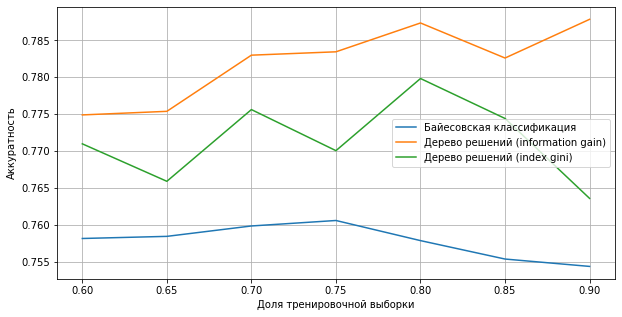

In [10]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(sample_ratios, accuracy_scores['gnb'], label='Байесовская классификация')
plt.plot(sample_ratios, accuracy_scores['dtc_inf_gain'], label='Дерево решений (information gain)')
plt.plot(sample_ratios, accuracy_scores['dtc_gini'], label='Дерево решений (index gini)')
plt.legend()

plt.xticks(sample_ratios)

plt.xlabel("Доля тренировочной выборки")
plt.ylabel("Аккуратность")

plt.show()

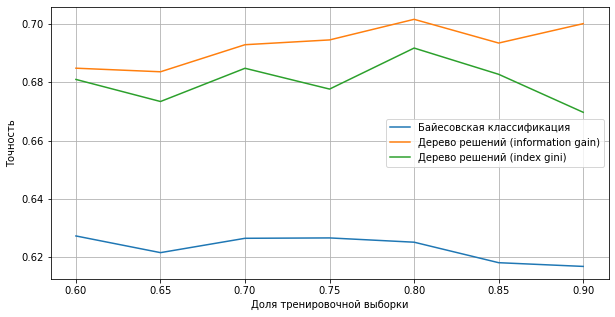

In [11]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(sample_ratios, precision_scores['gnb'], label='Байесовская классификация')
plt.plot(sample_ratios, precision_scores['dtc_inf_gain'], label='Дерево решений (information gain)')
plt.plot(sample_ratios, precision_scores['dtc_gini'], label='Дерево решений (index gini)')
plt.legend()

plt.xticks(sample_ratios)

plt.xlabel("Доля тренировочной выборки")
plt.ylabel("Точность")

plt.show()

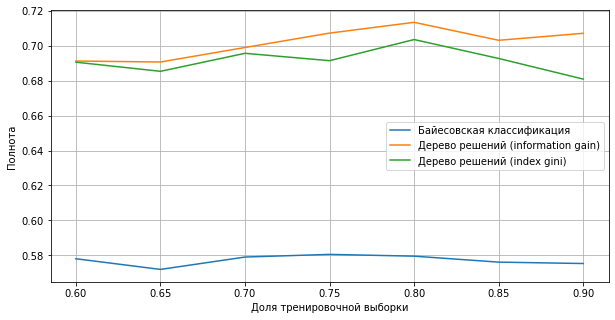

In [12]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(sample_ratios, recall_scores['gnb'], label='Байесовская классификация')
plt.plot(sample_ratios, recall_scores['dtc_inf_gain'], label='Дерево решений (information gain)')
plt.plot(sample_ratios, recall_scores['dtc_gini'], label='Дерево решений (index gini)')
plt.legend()

plt.xticks(sample_ratios)

plt.xlabel("Доля тренировочной выборки")
plt.ylabel("Полнота")

plt.show()

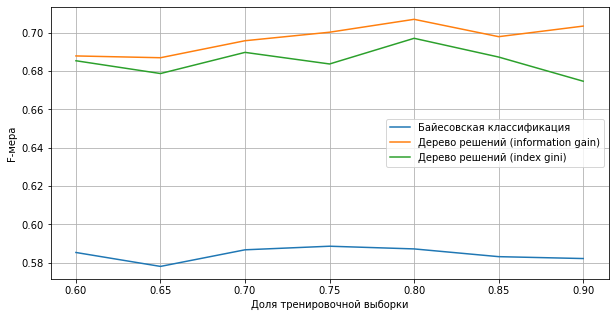

In [13]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(sample_ratios, f1_scores['gnb'], label='Байесовская классификация')
plt.plot(sample_ratios, f1_scores['dtc_inf_gain'], label='Дерево решений (information gain)')
plt.plot(sample_ratios, f1_scores['dtc_gini'], label='Дерево решений (index gini)')
plt.legend()

plt.xticks(sample_ratios)

plt.xlabel("Доля тренировочной выборки")
plt.ylabel("F-мера")

plt.show()

#Сравнение всех методов классификации при доле тренировочной выборки 60%

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['income'], axis=1), data['income'], 
                                                    train_size=0.6, random_state=1)

x_values = []
y_values_accuracy = []
y_values_precision = []
y_values_recall = []
y_values_f1 = []

gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
x_values.append('Байесовская классификация')
y_values_accuracy.append(accuracy_score(y_test, gnb_pred))
y_values_precision.append(precision_score(y_test, gnb_pred, average='macro'))
y_values_recall.append(recall_score(y_test, gnb_pred, average='macro'))
y_values_f1.append(f1_score(y_test, gnb_pred, average='macro'))

dtc = DecisionTreeClassifier(criterion='entropy')
dtc_pred = dtc.fit(X_train, y_train).predict(X_test)
x_values.append('Дерево решений (information gain)')
y_values_accuracy.append(accuracy_score(y_test, dtc_pred))
y_values_precision.append(precision_score(y_test, dtc_pred, average='macro'))
y_values_recall.append(recall_score(y_test, dtc_pred, average='macro'))
y_values_f1.append(f1_score(y_test, dtc_pred, average='macro'))

dtc = DecisionTreeClassifier(criterion='gini')
dtc_pred = dtc.fit(X_train, y_train).predict(X_test)
x_values.append('Дерево решений (index gini)')
y_values_accuracy.append(accuracy_score(y_test, dtc_pred))
y_values_precision.append(precision_score(y_test, dtc_pred, average='macro'))
y_values_recall.append(recall_score(y_test, dtc_pred, average='macro'))
y_values_f1.append(f1_score(y_test, dtc_pred, average='macro'))

for i in range(50, 101, 10):
    bc = BaggingClassifier(n_estimators=i)
    bc_pred = dtc.fit(X_train, y_train).predict(X_test)
    x_values.append('Бэггинг (%d)' % i)
    y_values_accuracy.append(accuracy_score(y_test, bc_pred))
    y_values_precision.append(precision_score(y_test, bc_pred, average='macro'))
    y_values_recall.append(recall_score(y_test, bc_pred, average='macro'))
    y_values_f1.append(f1_score(y_test, bc_pred, average='macro'))
    
for i in range(50, 101, 10):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc_pred = dtc.fit(X_train, y_train).predict(X_test)
    x_values.append('Случайный лес (%d)' % i)
    y_values_accuracy.append(accuracy_score(y_test, rfc_pred))
    y_values_precision.append(precision_score(y_test, rfc_pred, average='macro'))
    y_values_recall.append(recall_score(y_test, rfc_pred, average='macro'))
    y_values_f1.append(f1_score(y_test, rfc_pred, average='macro'))
    
for i in range(50, 101, 10):
    gbc = GradientBoostingClassifier(n_estimators=i)
    gbc_pred = dtc.fit(X_train, y_train).predict(X_test)
    x_values.append('Бустинг (%d)' % i)
    y_values_accuracy.append(accuracy_score(y_test, gbc_pred))
    y_values_precision.append(precision_score(y_test, gbc_pred, average='macro'))
    y_values_recall.append(recall_score(y_test, gbc_pred, average='macro'))
    y_values_f1.append(f1_score(y_test, gbc_pred, average='macro'))

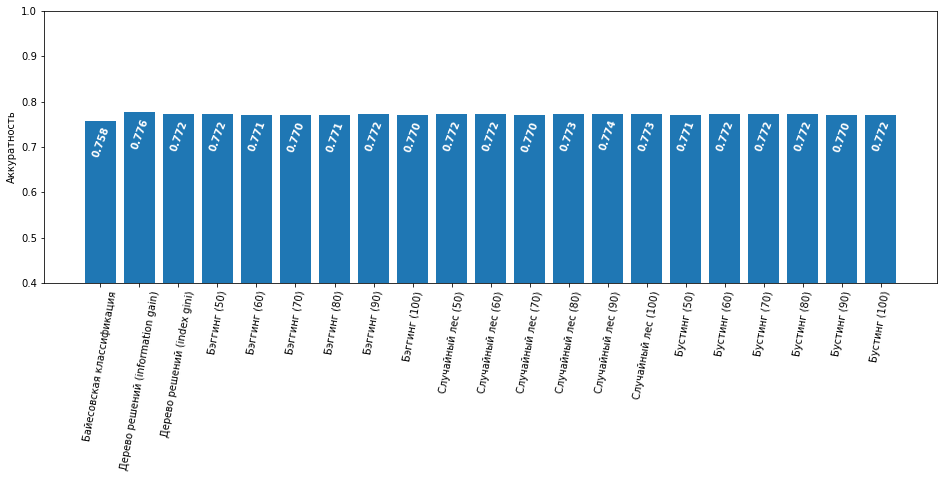

In [15]:
plt.figure(figsize=(16, 5))

plt.bar(x_values, y_values_accuracy)

plt.xticks(rotation=80)
plt.ylabel("Аккуратность")

for index, value in enumerate(y_values_accuracy):
    plt.text(index - 0.25, value - 0.08, str("%.3f" % value), 
             color = 'white', fontweight = 'bold', rotation = 70)

ax = plt.gca()
ax.set_ylim([0.4, 1.0])

plt.show()

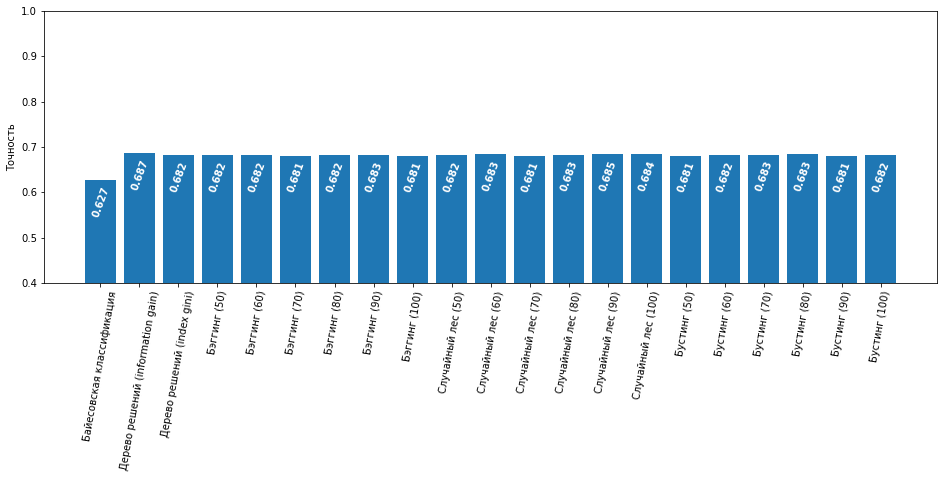

In [16]:
plt.figure(figsize=(16, 5))

plt.bar(x_values, y_values_precision)

plt.xticks(rotation=80)
plt.ylabel("Точность")

for index, value in enumerate(y_values_precision):
    plt.text(index - 0.25, value - 0.08, str("%.3f" % value), 
             color = 'white', fontweight = 'bold', rotation = 70)

ax = plt.gca()
ax.set_ylim([0.4, 1.0])

plt.show()


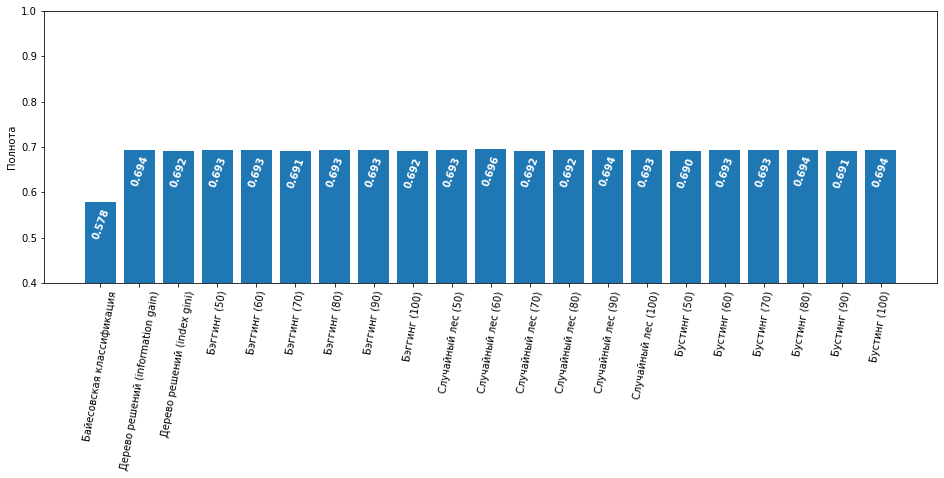

In [17]:
plt.figure(figsize=(16, 5))

plt.bar(x_values, y_values_recall)

plt.xticks(rotation=80)
plt.ylabel("Полнота")

for index, value in enumerate(y_values_recall):
    plt.text(index - 0.25, value - 0.08, str("%.3f" % value), 
             color = 'white', fontweight = 'bold', rotation = 70)

ax = plt.gca()
ax.set_ylim([0.4, 1.0])

plt.show()

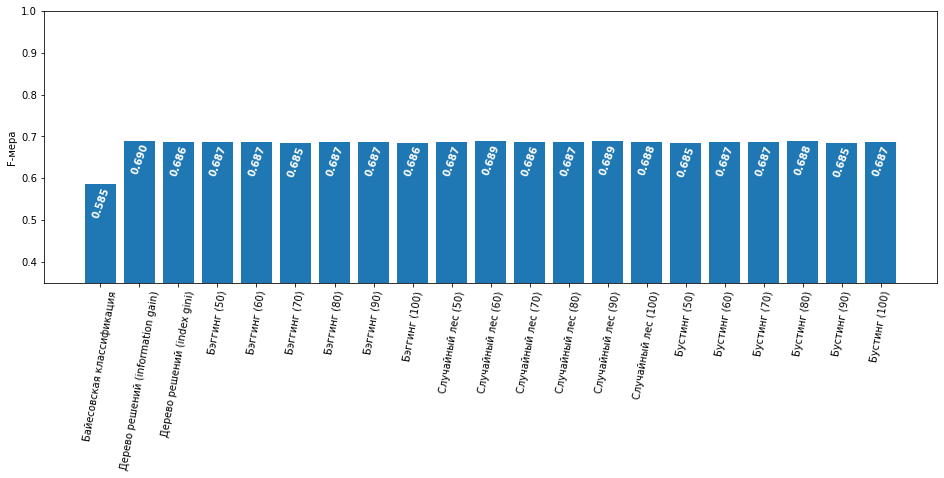

In [18]:
plt.figure(figsize=(16, 5))

plt.bar(x_values, y_values_f1)

plt.xticks(rotation=80)
plt.ylabel("F-мера")

for index, value in enumerate(y_values_f1):
    plt.text(index - 0.25, value - 0.08, str("%.3f" % value), 
             color = 'white', fontweight = 'bold', rotation = 70)

ax = plt.gca()
ax.set_ylim([0.35, 1.0])

plt.show()